In [2]:
from qiskit import *
import numpy as np
from qiskit import IBMQ

token='a2afa69f70955de3c84068e58c44bd81e01740c07ff40db7e9ab824c0da8b9412da7a86e9c453f7f97ecc35fc9f09948ce053cbd9e8213b98feadba15dcc467f'
#IBMQ.enable_account(token)
IBMQ.save_account(token,overwrite=True)
IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-ornl',group='ornl',project='csc517')
#backend = provider.get_backend('ibm_hanoi')
#backend_config = backend.configuration()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

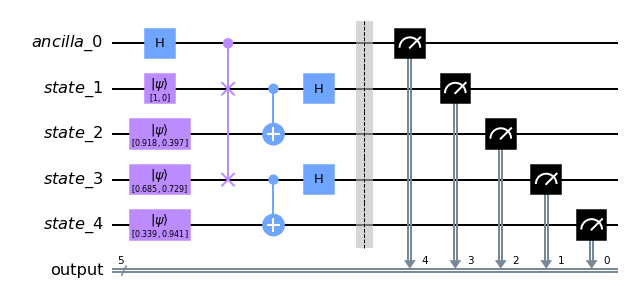

In [3]:
ancilla = QuantumRegister(1, 'ancilla_0')
A = QuantumRegister(1,'state_1')
B = QuantumRegister(1,'state_2')
C = QuantumRegister(1,'state_3')
D = QuantumRegister(1,'state_4')
Meas = ClassicalRegister(5,'output')

circuit = QuantumCircuit(ancilla, A, B, C, D, Meas)

angle = 0.26*np.pi
for i in range(0,4):
    circuit.initialize([np.cos(i*angle/2),np.sin(i*angle/2)],i+1)
#circuit.initialize([-np.cos(3*angle/2),-np.sin(3*angle/2)],4)

circuit.h(0)

circuit.cswap(0,1,3)

circuit.cx(1,2)
circuit.cx(3,4)
circuit.h(1)
circuit.h(3)

circuit.barrier()

for i in range(0,5):
    circuit.measure(i,4-i)

circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
shots = 10000
job = execute(circuit,simulator,shots=shots)

result = job.result()
counts = result.get_counts(circuit)

#print(counts['01100']/shots)
#print(counts['01101']/shots)
#print(counts['01110']/shots)
#print(counts['01111']/shots)

r12 = 1-4*(counts.get('01100',0)+counts.get('01101',0)+counts.get('01110',0)+counts.get('01111',0))/shots
#r12 = 1-4*(counts.get('00110',0)+counts.get('10110',0)+counts.get('01110',0)+counts.get('11110',0))/shots
print(f"r_12 = {r12}")
r23 = 1-4*(counts.get('11100',0)+counts.get('11101',0)+counts.get('11110',0)+counts.get('11111',0))/shots
print(f"r_23 = {r23}")
r34 = 1-4*(counts.get('00011',0)+counts.get('00111',0)+counts.get('01011',0)+counts.get('01111',0))/shots
print(f"r_34 = {r34}")
r14 = 1-4*(counts.get('10011',0)+counts.get('10111',0)+counts.get('11011',0)+counts.get('11111',0))/shots
print(f"r_14 = {r14}")

inequality = r12 + r23 + r34 - r14

print(f"r_12 + r_23 + r_34 - r_14 = {inequality}")

print(f"\nraw:\n{angle/np.pi},{r12},{r23},{r34},{r14},{inequality}")

r_12 = 0.8432
r_23 = 0.8311999999999999
r_34 = 0.8428
r_14 = 0.13439999999999996
r_12 + r_23 + r_34 - r_14 = 2.3828

raw:
0.26,0.8432,0.8311999999999999,0.8428,0.13439999999999996,2.3828


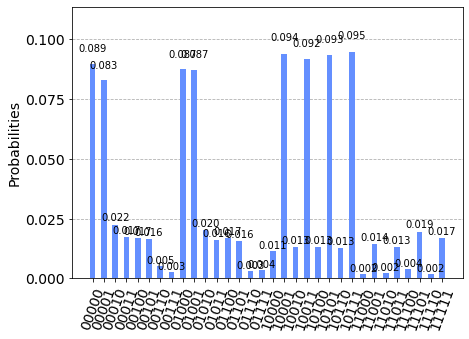

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [259]:
def four_state_Bell_measurement(angle_input,shots):
    ancilla = QuantumRegister(1, 'ancilla_0')
    A = QuantumRegister(1,'state_1')
    B = QuantumRegister(1,'state_2')
    C = QuantumRegister(1,'state_3')
    D = QuantumRegister(1,'state_4')
    Meas = ClassicalRegister(5,'output')

    circuit = QuantumCircuit(ancilla, A, B, C, D, Meas)

    angle = angle_input*np.pi
    for i in range(0,4):
        circuit.initialize([np.cos(i*angle/2),np.sin(i*angle/2)],i+1)

    circuit.h(0)

    circuit.cswap(0,1,3)
    circuit.cx(1,2)
    circuit.cx(3,4)
    circuit.h(1)
    circuit.h(3)

    for i in range(0,5):
        circuit.measure(i,4-i)
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit,simulator,shots=shots)

    result = job.result()
    counts = result.get_counts(circuit)
    r12 = 1-4*(counts.get('01100',0)+counts.get('01101',0)+counts.get('01110',0)+counts.get('01111',0))/shots
    r23 = 1-4*(counts.get('11100',0)+counts.get('11101',0)+counts.get('11110',0)+counts.get('11111',0))/shots
    r34 = 1-4*(counts.get('00011',0)+counts.get('00111',0)+counts.get('01011',0)+counts.get('01111',0))/shots
    r14 = 1-4*(counts.get('10011',0)+counts.get('10111',0)+counts.get('11011',0)+counts.get('11111',0))/shots

    inequality = r12 + r23 + r34 - r14
    print(f"{angle/np.pi},{r12},{r23},{r34},{r14},{inequality}")

In [261]:
print("angle*pi,r_12,r_23,r_34,r_14,r_12+r_23+r_34-r_14")
for i in range(0,51):
    four_state_Bell_measurement(i/100,10000)

angle*pi,r_12,r_23,r_34,r_14,r_12+r_23+r_34-r_14
0.0,1.0,1.0,1.0,1.0,2.0
0.01,0.9996,1.0,0.9992,0.9972,2.0016000000000003
0.02,0.9992,0.9992,0.9996,0.992,2.0060000000000002
0.03,0.9956,0.9984,0.998,0.9804,2.0116
0.04,0.9976,0.996,0.9952,0.9664,2.0223999999999998
0.05,0.9932,0.992,0.994,0.948,2.0311999999999997
0.06,0.9928,0.9904,0.9896,0.9176,2.0552
0.07,0.988,0.9884,0.9856,0.8944,2.0675999999999997
0.08,0.9884,0.9844,0.9824,0.864,2.0912
0.09,0.9816,0.9772,0.982,0.8196,2.1212000000000004
0.1,0.97,0.9772,0.9792,0.7912,2.1352
0.11,0.97,0.9704,0.9668,0.7484,2.1588000000000003
0.12,0.972,0.9664,0.9648,0.7103999999999999,2.1928
0.13,0.956,0.9628,0.9596,0.6819999999999999,2.1964
0.14,0.9568,0.9532,0.954,0.6328,2.2312
0.15,0.9436,0.9432,0.9428,0.6024,2.2272
0.16,0.9344,0.9348,0.938,0.5252,2.282
0.17000000000000004,0.9324,0.9348,0.9312,0.46719999999999995,2.3312
0.18,0.9296,0.9252,0.9396,0.45120000000000005,2.3432
0.18999999999999997,0.9108,0.9084,0.9116,0.3832,2.3476
0.2,0.9048,0.8988,0.9056,